In [1]:
# Importing the libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv("./../Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x = dataset.iloc[:, 3:].values

In [4]:
from sklearn.cluster import KMeans

In [5]:
# Using the elbow method to find the optimal number of clusters
def elbow(x):
    wcss = [None] * 10
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
        kmeans.fit(x)
        wcss[i - 1] = kmeans.inertia_
    
    plt.figure(figsize = (7, 5))
    plt.plot(range(1, 11), wcss, marker = '.')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

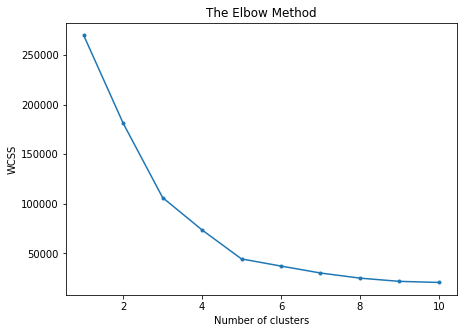

In [6]:
elbow(x)

In [7]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
clasters = kmeans.fit_predict(x)

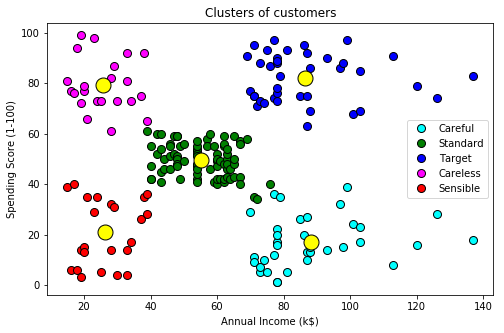

In [8]:
# Visualising the clusters
plt.figure(figsize = (8, 5))
x1, x2 = x[:, 0], x[:, 1]
centroid_x, centroid_y = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

plt.plot(
    x1[clasters == 0], x2[clasters == 0],
    marker = 'o',
    markeredgecolor = "black",
    color = "cyan",
    markersize = 8,
    linestyle = '',
)

plt.plot(
    x1[clasters == 1], x2[clasters == 1],
    marker = 'o',
    markeredgecolor = "black",
    color = "green",
    markersize = 8,
    linestyle = '',
)

plt.plot(
    x1[clasters == 2], x2[clasters == 2],
    marker = 'o',
    markeredgecolor = "black",
    color = "blue",
    markersize = 8,
    linestyle = '',
)

plt.plot(
    x1[clasters == 3], x2[clasters == 3],
    marker = 'o',
    markeredgecolor = "black",
    color = "magenta",
    markersize = 8,
    linestyle = '',
)

plt.plot(
    x1[clasters == 4], x2[clasters == 4],
    marker = 'o',
    markeredgecolor = "black",
    color = "red",
    markersize = 8,
    linestyle = '',
)

plt.plot(
    centroid_x, centroid_y,
    marker = 'o',
    markeredgecolor = "black",
    color = "yellow",
    markersize = 15,
    linestyle = '',
    label = 'Centroids'
)

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(["Careful", "Standard", "Target", "Careless",  "Sensible"])
plt.show()